In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

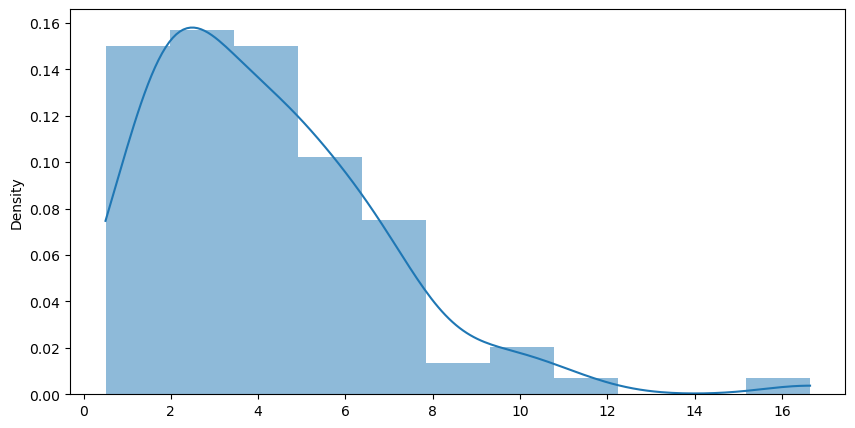

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,Distribution,D,p-value
0,f,0.058357,0.87
1,chi2,0.058371,0.87
2,gamma,0.058372,0.87
3,beta,0.079717,0.52
4,t,0.088272,0.39
5,norm,0.106870,0.19
6,rayleigh,0.111662,0.15
7,uniform,0.489694,0.00


In [6]:
# Create sample data

#K-S Test

shape, scale =  2,2 # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100)

# Display histogram of the sample data
plt.figure(figsize=(10,5))  
sns.histplot(s, kde=True, stat='density', linewidth=0)
plt.show()


dist_list = [
    'norm', 't', 'chi2', 'f', 'gamma', 'beta', 'rayleigh', 'uniform'
]

result = []


for dist in dist_list:
    dist = getattr(stats, dist)
    param = dist.fit(s)
    a = stats.kstest(s, dist.name, args=param)
    result.append((dist.name, a[0], a[1].round(2)))
    
df = pd.DataFrame(result, columns=['Distribution', 'D', 'p-value'])
df.sort_values(by=['D', 'p-value'], inplace=True)
df.reset_index(inplace=True, drop=True)
display(df)

